<a href="https://colab.research.google.com/github/shiv75p/trader_behavior_assignment/blob/main/trader_behavior_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
from datetime import datetime, timezone, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

pd.set_option('display.max_columns', 50)
sns.set_style('whitegrid')

In [6]:
df=pd.read_csv('/content/historical_data.csv')

/tmp/ipython-input-3841820762.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/historical_data.csv')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158623 entries, 0 to 158622
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           158623 non-null  object 
 1   Coin              158623 non-null  object 
 2   Execution Price   158623 non-null  float64
 3   Size Tokens       158623 non-null  float64
 4   Size USD          158623 non-null  float64
 5   Side              158623 non-null  object 
 6   Timestamp IST     158623 non-null  object 
 7   Start Position    158622 non-null  float64
 8   Direction         158622 non-null  object 
 9   Closed PnL        158622 non-null  float64
 10  Transaction Hash  158622 non-null  object 
 11  Order ID          158622 non-null  float64
 12  Crossed           158622 non-null  object 
 13  Fee               158622 non-null  float64
 14  Trade ID          158622 non-null  float64
 15  Timestamp         158622 non-null  float64
dtypes: float64(9), objec

In [9]:
df.shape

(158623, 16)

In [10]:
df.isnull().sum()

,0
account,0
coin,0
execution_price,0
size_tokens,0
size_usd,0
side,0
timestamp_ist,0
start_position,1
direction,1
closed_pnl,1


In [60]:
df.head()

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,ts_ist,ts_utc,trade_date,trade_hour,pnl_pct,win,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12 22:50:00+05:30,2024-02-12 17:20:00+00:00,2024-02-12,17.0,0.0,0,2024-02-12,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12 22:50:00+05:30,2024-02-12 17:20:00+00:00,2024-02-12,17.0,0.0,0,2024-02-12,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12 22:50:00+05:30,2024-02-12 17:20:00+00:00,2024-02-12,17.0,0.0,0,2024-02-12,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12 22:50:00+05:30,2024-02-12 17:20:00+00:00,2024-02-12,17.0,0.0,0,2024-02-12,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12 22:50:00+05:30,2024-02-12 17:20:00+00:00,2024-02-12,17.0,0.0,0,2024-02-12,Greed


from matplotlib import pyplot as plt
_df_0['execution_price'].plot(kind='hist', bins=20, title='execution_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['size_tokens'].plot(kind='hist', bins=20, title='size_tokens')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['size_usd'].plot(kind='hist', bins=20, title='size_usd')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['start_position'].plot(kind='hist', bins=20, title='start_position')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='execution_price', y='size_tokens', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='size_tokens', y='size_usd', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='size_usd', y='start_position', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='start_position', y='fee', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['execution_price']
  ys = series['size_tokens']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('execution_price', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('execution_price')
_ = plt.ylabel('size_tokens')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['execution_price']
  ys = series['size_usd']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('execution_price', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('execution_price')
_ = plt.ylabel('size_usd')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['execution_price']
  ys = series['fee']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('execution_price', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('execution_price')
_ = plt.ylabel('fee')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['execution_price']
  ys = series['trade_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('execution_price', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('execution_price')
_ = plt.ylabel('trade_id')

from matplotlib import pyplot as plt
_df_12['execution_price'].plot(kind='line', figsize=(8, 4), title='execution_price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['size_tokens'].plot(kind='line', figsize=(8, 4), title='size_tokens')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['size_usd'].plot(kind='line', figsize=(8, 4), title='size_usd')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['start_position'].plot(kind='line', figsize=(8, 4), title='start_position')
plt.gca().spines[['top', 'right']].set_visible(False)

In [13]:
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]

In [19]:
print("Null counts:\n", df.isna().sum())

Null counts:
 account             0
coin                0
execution_price     0
size_tokens         0
size_usd            0
side                0
timestamp_ist       0
start_position      1
direction           1
closed_pnl          1
transaction_hash    1
order_id            1
crossed             1
fee                 0
trade_id            1
timestamp           1
dtype: int64


In [20]:
print(df.columns.tolist())


['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side', 'timestamp_ist', 'start_position', 'direction', 'closed_pnl', 'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id', 'timestamp']


In [21]:
print("Null counts:\n", df.isna().sum())

if 'fee' in df.columns:
    df['fee'] = df['fee'].fillna(0.0)

print("Null counts after filling fee:\n", df.isna().sum())


Null counts:
 account             0
coin                0
execution_price     0
size_tokens         0
size_usd            0
side                0
timestamp_ist       0
start_position      1
direction           1
closed_pnl          1
transaction_hash    1
order_id            1
crossed             1
fee                 0
trade_id            1
timestamp           1
dtype: int64
Null counts after filling fee:
 account             0
coin                0
execution_price     0
size_tokens         0
size_usd            0
side                0
timestamp_ist       0
start_position      1
direction           1
closed_pnl          1
transaction_hash    1
order_id            1
crossed             1
fee                 0
trade_id            1
timestamp           1
dtype: int64


In [30]:
missing_rows = df[df.isna().any(axis=1)]
missing_rows
df = df.dropna()

df = df.dropna().reset_index(drop=True)
df.isnull().sum()

,0
account,0
coin,0
execution_price,0
size_tokens,0
size_usd,0
side,0
timestamp_ist,0
start_position,0
direction,0
closed_pnl,0


In [34]:

df['ts_ist'] = pd.to_datetime(df['timestamp_ist'], errors='coerce')

if df['ts_ist'].dt.tz is None:
    df['ts_ist'] = df['ts_ist'].dt.tz_localize('Asia/Kolkata')


In [35]:
df['ts_utc'] = df['ts_ist'].dt.tz_convert('UTC')
df['trade_date'] = df['ts_utc'].dt.date
df['trade_hour'] = df['ts_utc'].dt.hour


In [36]:

print("Unique coins:", df['coin'].nunique())
print("Unique accounts:", df['account'].nunique())

top_coins = df['coin'].value_counts().head(10)
print("\nTop traded coins:\n", top_coins)


Unique coins: 242
Unique accounts: 27

Top traded coins:
 coin
HYPE         42031
BTC          24237
@107         15711
ETH           9938
SOL           8444
MELANIA       4246
PURR/USDC     2763
FARTCOIN      2474
WLD           1983
kPEPE         1724
Name: count, dtype: int64


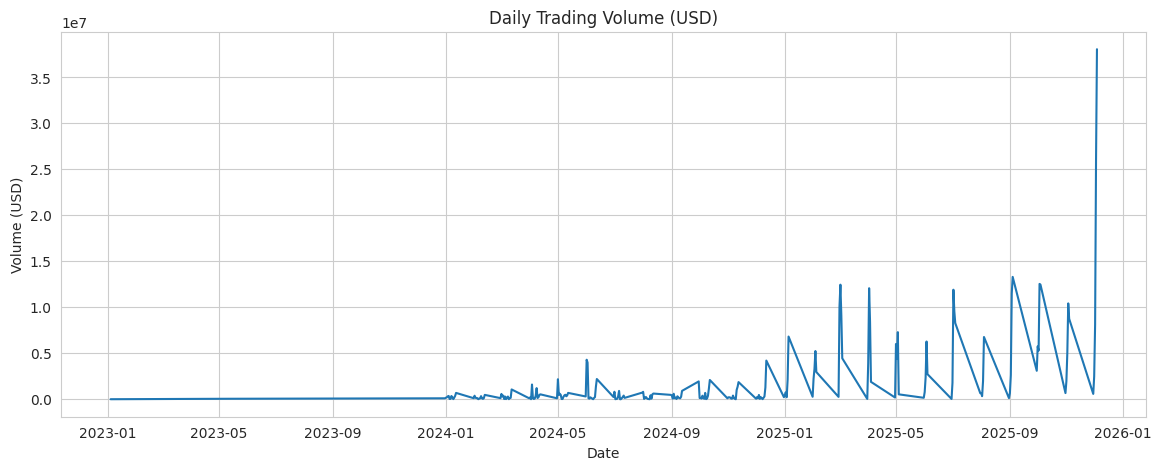

In [37]:
# daily volume (USD)
daily_vol = df.groupby('trade_date')['size_usd'].sum()

plt.figure(figsize=(14,5))
daily_vol.plot()
plt.title("Daily Trading Volume (USD)")
plt.ylabel("Volume (USD)")
plt.xlabel("Date")
plt.show()


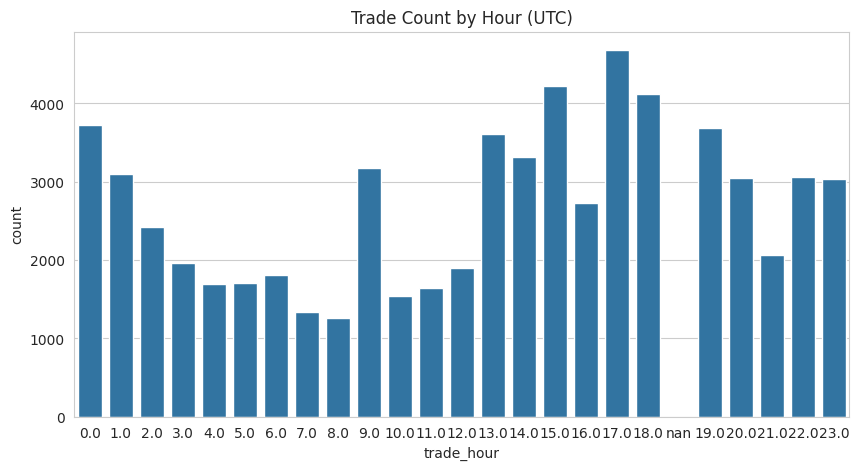

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(x='trade_hour', data=df, order=sorted(df['trade_hour'].unique()))
plt.title("Trade Count by Hour (UTC)")
plt.show()


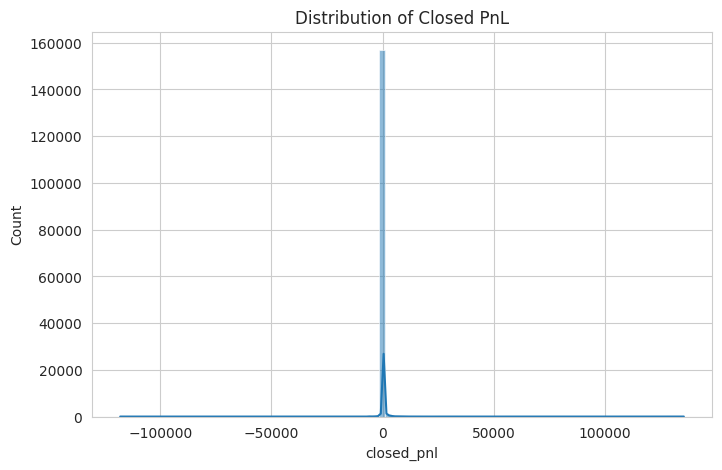

In [39]:
plt.figure(figsize=(8,5))
sns.histplot(df['closed_pnl'], bins=100, kde=True)
plt.title("Distribution of Closed PnL")
plt.show()


In [54]:
df2=pd.read_csv('/content/fear_greed_index.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158622 entries, 0 to 158621
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype                       
---  ------            --------------   -----                       
 0   account           158622 non-null  object                      
 1   coin              158622 non-null  object                      
 2   execution_price   158622 non-null  float64                     
 3   size_tokens       158622 non-null  float64                     
 4   size_usd          158622 non-null  float64                     
 5   side              158622 non-null  object                      
 6   timestamp_ist     158622 non-null  object                      
 7   start_position    158622 non-null  float64                     
 8   direction         158622 non-null  object                      
 9   closed_pnl        158622 non-null  float64                     
 10  transaction_hash  158622 non-null  object               

In [49]:
for c in df2.columns:
    print(f"'{c}'")

'timestamp'
'value'
'classification'
'date'


In [55]:
df_trader = pd.read_csv('/content/historical_data.csv')  # या updated trader file
df_trader.columns = [c.strip().lower().replace(' ', '_') for c in df_trader.columns]


In [56]:
df_trader['ts_ist'] = pd.to_datetime(df_trader['timestamp_ist'], errors='coerce')

def ensure_ist(ts):
    if ts is pd.NaT:
        return ts
    if ts.tzinfo is None:
        return ts.tz_localize('Asia/Kolkata')
    return ts

df_trader['ts_ist'] = df_trader['ts_ist'].apply(ensure_ist)
df_trader['ts_utc'] = df_trader['ts_ist'].dt.tz_convert('UTC')
df_trader['trade_date'] = df_trader['ts_utc'].dt.date
df_trader['trade_hour'] = df_trader['ts_utc'].dt.hour


In [57]:
df_trader['pnl_pct'] = df_trader['closed_pnl'] / df_trader['size_usd'].replace({0: np.nan})
df_trader['win'] = (df_trader['closed_pnl'] > 0).astype(int)


In [58]:
df_sent = pd.read_csv('/content/fear_greed_index.csv')
df_sent.columns = [c.strip().lower().replace(' ', '_') for c in df_sent.columns]
df_sent['date'] = pd.to_datetime(df_sent['date']).dt.date

df = df_trader.merge(df_sent[['date','classification']], left_on='trade_date', right_on='date', how='left')
df['classification'] = df['classification'].fillna('Unknown')


In [61]:
# Group by account + sentiment
trader_sent_metrics = df.groupby(['account','classification']).agg(
    trades_count=('closed_pnl','count'),
    total_pnl=('closed_pnl','sum'),
    avg_pnl=('closed_pnl','mean'),
    win_rate=('win','mean'),
    avg_notional=('size_usd','mean')
).reset_index()

trader_sent_metrics.head()


,account,classification,trades_count,total_pnl,avg_pnl,win_rate,avg_notional
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Extreme Fear,392,99958.651460,254.996560,0.533163,23910.855485
1,0x083384f897ee0f19899168e3b1bec365f52a9012,Extreme Greed,177,0.000000,0.000000,0.000000,5089.718249
2,0x083384f897ee0f19899168e3b1bec365f52a9012,Fear,1619,910647.967350,562.475582,0.413836,13220.264009
3,0x083384f897ee0f19899168e3b1bec365f52a9012,Greed,132,-89418.778615,-677.414990,0.340909,36729.064924
4,0x083384f897ee0f19899168e3b1bec365f52a9012,Neutral,166,44400.905800,267.475336,0.469880,23733.479458


In [62]:
market_sent_metrics = df.groupby('classification').agg(
    total_trades=('closed_pnl','count'),
    total_pnl=('closed_pnl','sum'),
    avg_pnl=('closed_pnl','mean'),
    win_rate=('win','mean'),
    avg_trade_size=('size_usd','mean')
).reset_index()

market_sent_metrics


,classification,total_trades,total_pnl,avg_pnl,win_rate,avg_trade_size
0,Extreme Fear,2495,1.595979e+05,63.967077,0.377154,6400.917359
1,Extreme Greed,5835,1.083768e+06,185.735746,0.541902,3186.503350
2,Fear,14116,1.634455e+06,115.787381,0.380490,5206.804921
3,Greed,11258,6.975788e+05,61.962941,0.458963,4879.338891
4,Neutral,2682,1.199315e+05,44.717193,0.457122,5605.800705
5,Unknown,174838,6.601628e+06,37.758542,0.406102,5794.840330


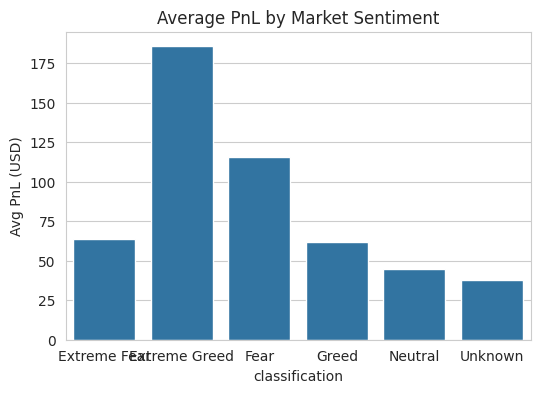

In [63]:
plt.figure(figsize=(6,4))
sns.barplot(x='classification', y='avg_pnl', data=market_sent_metrics)
plt.title("Average PnL by Market Sentiment")
plt.ylabel("Avg PnL (USD)")
plt.show()


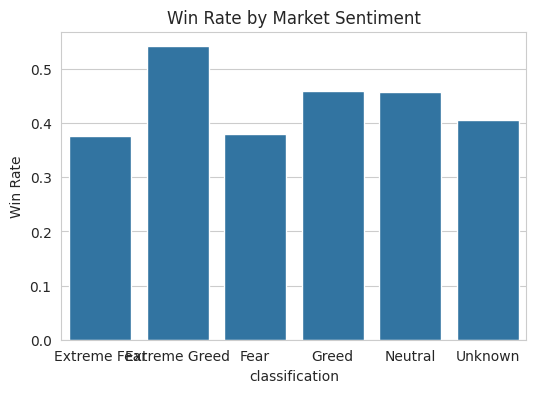

In [64]:
plt.figure(figsize=(6,4))
sns.barplot(x='classification', y='win_rate', data=market_sent_metrics)
plt.title("Win Rate by Market Sentiment")
plt.ylabel("Win Rate")
plt.show()


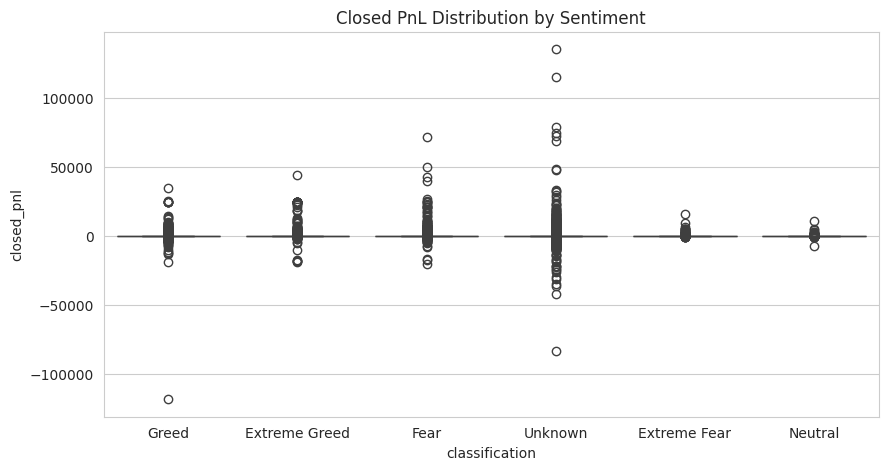

In [65]:
plt.figure(figsize=(10,5))
sns.boxplot(x='classification', y='closed_pnl', data=df)
plt.title("Closed PnL Distribution by Sentiment")
plt.show()


In [66]:
top_traders = trader_sent_metrics.groupby('account')['total_pnl'].sum().sort_values(ascending=False).head(10)
print(top_traders)


account
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    2.143383e+06
0x083384f897ee0f19899168e3b1bec365f52a9012    1.600230e+06
0xbaaaf6571ab7d571043ff1e313a9609a10637864    9.401638e+05
0x513b8629fe877bb581bf244e326a047b249c4ff1    8.404226e+05
0xbee1707d6b44d4d52bfe19e41f8a828645437aab    8.360806e+05
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4    6.777471e+05
0x72743ae2822edd658c0c50608fd7c5c501b2afbd    4.293556e+05
0x430f09841d65beb3f27765503d0f850b8bce7713    4.165419e+05
0x72c6a4624e1dffa724e6d00d64ceae698af892a0    4.030115e+05
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4    3.790954e+05
Name: total_pnl, dtype: float64


In [67]:
# Filter only Fear and Greed
df_fg = df[df['classification'].isin(['Fear','Greed'])]

# Separate PnL series
pnl_fear = df_fg[df_fg['classification']=='Fear']['closed_pnl']
pnl_greed = df_fg[df_fg['classification']=='Greed']['closed_pnl']

# Mann-Whitney U test (non-parametric, for distributions)
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(pnl_fear, pnl_greed, alternative='two-sided')
print(f"Mann-Whitney U test: stat={stat}, p-value={p}")


Mann-Whitney U test: stat=73920305.0, p-value=9.020010884969462e-25


In [68]:
# Pivot table: sentiment vs win rate
win_rate_table = df_fg.groupby('classification')['win'].mean()
print(win_rate_table)


classification
Fear     0.380490
Greed    0.458963
Name: win, dtype: float64


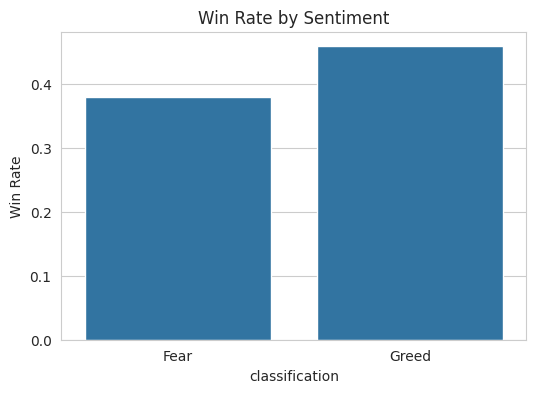

In [69]:
plt.figure(figsize=(6,4))
sns.barplot(x=win_rate_table.index, y=win_rate_table.values)
plt.title("Win Rate by Sentiment")
plt.ylabel("Win Rate")
plt.show()


In [70]:
import statsmodels.formula.api as smf

# Convert classification to categorical
df_fg['classification_cat'] = df_fg['classification'].astype('category')

# Linear regression
model = smf.ols("closed_pnl ~ C(classification_cat) + size_usd + C(coin)", data=df_fg).fit()
print(model.summary())


/tmp/ipython-input-2843806460.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fg['classification_cat'] = df_fg['classification'].astype('category')


                            OLS Regression Results                            
Dep. Variable:             closed_pnl   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.828
Date:                Wed, 24 Sep 2025   Prob (F-statistic):           1.08e-27
Time:                        19:46:27   Log-Likelihood:            -2.1907e+05
No. Observations:               25374   AIC:                         4.384e+05
Df Residuals:                   25223   BIC:                         4.397e+05
Df Model:                         150                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

all code and step  here one cell

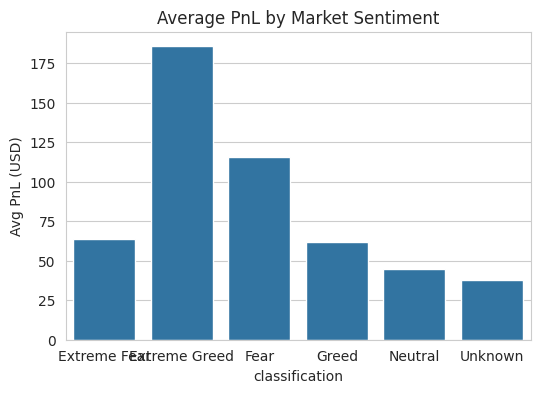

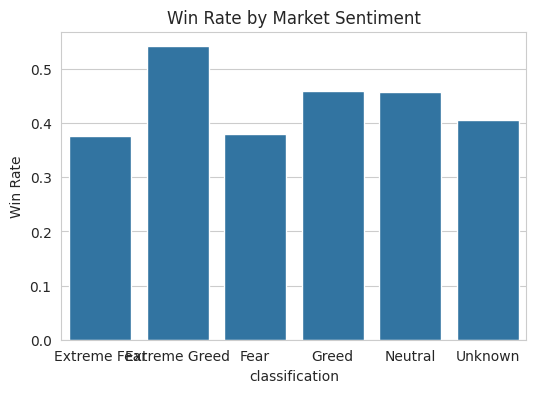

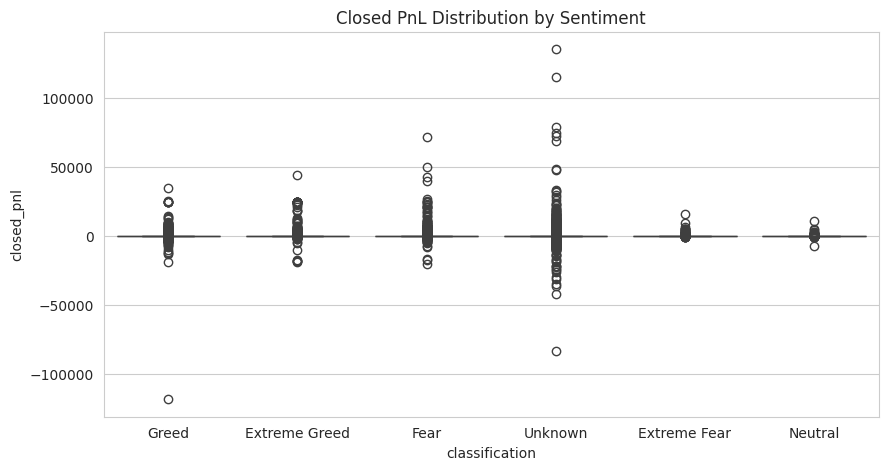

Mann-Whitney U test: stat=73920305.0, p-value=9.020010884969462e-25
Win Rate by Sentiment:
 classification
Fear     0.380490
Greed    0.458963
Name: win, dtype: float64


/tmp/ipython-input-1202244031.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fg['classification_cat'] = df_fg['classification'].astype('category')


                            OLS Regression Results                            
Dep. Variable:             closed_pnl   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.828
Date:                Wed, 24 Sep 2025   Prob (F-statistic):           1.08e-27
Time:                        19:47:53   Log-Likelihood:            -2.1907e+05
No. Observations:               25374   AIC:                         4.384e+05
Df Residuals:                   25223   BIC:                         4.397e+05
Df Model:                         150                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [71]:

# 1️ Imports & Settings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
import statsmodels.formula.api as smf

pd.set_option('display.max_columns', 50)
sns.set_style('whitegrid')


# 2️ Load Trader Data

df_trader = pd.read_csv('/content/historical_data.csv')
df_trader.columns = [c.strip().lower().replace(' ', '_') for c in df_trader.columns]

# Fill missing numeric columns
df_trader['fee'] = df_trader['fee'].fillna(0.0)


# 3️ Timestamp Parsing

df_trader['ts_ist'] = pd.to_datetime(df_trader['timestamp_ist'], errors='coerce')

def ensure_ist(ts):
    if ts is pd.NaT:
        return ts
    if ts.tzinfo is None:
        return ts.tz_localize('Asia/Kolkata')
    return ts

df_trader['ts_ist'] = df_trader['ts_ist'].apply(ensure_ist)
df_trader['ts_utc'] = df_trader['ts_ist'].dt.tz_convert('UTC')
df_trader['trade_date'] = df_trader['ts_utc'].dt.date
df_trader['trade_hour'] = df_trader['ts_utc'].dt.hour


# 4️ Derived Metrics

df_trader['pnl_pct'] = df_trader['closed_pnl'] / df_trader['size_usd'].replace({0: np.nan})
df_trader['win'] = (df_trader['closed_pnl'] > 0).astype(int)

# 5️ Load & Merge Sentiment

df_sent = pd.read_csv('/content/fear_greed_index.csv')
df_sent.columns = [c.strip().lower().replace(' ', '_') for c in df_sent.columns]
df_sent['date'] = pd.to_datetime(df_sent['date']).dt.date

df = df_trader.merge(df_sent[['date','classification']], left_on='trade_date', right_on='date', how='left')
df['classification'] = df['classification'].fillna('Unknown')

# 6️ Trader Metrics by Sentiment

trader_sent_metrics = df.groupby(['account','classification']).agg(
    trades_count=('closed_pnl','count'),
    total_pnl=('closed_pnl','sum'),
    avg_pnl=('closed_pnl','mean'),
    win_rate=('win','mean'),
    avg_notional=('size_usd','mean')
).reset_index()

# Market-level metrics
market_sent_metrics = df.groupby('classification').agg(
    total_trades=('closed_pnl','count'),
    total_pnl=('closed_pnl','sum'),
    avg_pnl=('closed_pnl','mean'),
    win_rate=('win','mean'),
    avg_trade_size=('size_usd','mean')
).reset_index()

# 7️ Visualizations
-
plt.figure(figsize=(6,4))
sns.barplot(x='classification', y='avg_pnl', data=market_sent_metrics)
plt.title("Average PnL by Market Sentiment")
plt.ylabel("Avg PnL (USD)")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x='classification', y='win_rate', data=market_sent_metrics)
plt.title("Win Rate by Market Sentiment")
plt.ylabel("Win Rate")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='classification', y='closed_pnl', data=df)
plt.title("Closed PnL Distribution by Sentiment")
plt.show()

# 8Statistical Analysis

df_fg = df[df['classification'].isin(['Fear','Greed'])]
pnl_fear = df_fg[df_fg['classification']=='Fear']['closed_pnl']
pnl_greed = df_fg[df_fg['classification']=='Greed']['closed_pnl']

stat, p = mannwhitneyu(pnl_fear, pnl_greed, alternative='two-sided')
print(f"Mann-Whitney U test: stat={stat}, p-value={p}")

win_rate_table = df_fg.groupby('classification')['win'].mean()
print("Win Rate by Sentiment:\n", win_rate_table)

# Optional regression
df_fg['classification_cat'] = df_fg['classification'].astype('category')
model = smf.ols("closed_pnl ~ C(classification_cat) + size_usd + C(coin)", data=df_fg).fit()
print(model.summary())


In [72]:
trader_sent_metrics.to_csv('trader_sent_metrics.csv', index=False)


In [73]:
market_sent_metrics.to_csv('market_sent_metrics.csv', index=False)
